<a href="https://colab.research.google.com/github/VictoriaRe/HSE-DataScience/blob/master/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Demostrate consequences of No Free Lunch Theorem: every model of machine learning makes assumptions about dataset properties. If the assumption fails, model perfoms badly. If the assumption is met, model perfoms good.

For each of the tasks, described below:
create a dataset to meet the description. 

For demonstration purposes, feature dimension size = 2
train the models and evaluate accuracy. (with a training pipeline, described in the seminar: separate the data into train, validation, and test)
Show which model is better.

Write what assumptions were used, and why model exibits such behavior.
Plot dataset to demonstrate its properties. (Scatter plot, classes with different colors)

Tasks:
Create dataset for binary classification task (binary crossentropy), where k-NN perfoms worse than logistic regression

Create dataset for binary classification task (binary crossentropy), where logistic regression perfoms worse than k-NN

Create dataset for binary classification task (binary crossentropy), where k-NN with cosine distance perfoms better than k-NN with euclidean distance

! If there is no explanation, why one model perfoms better than the other on your dataset, the task does not count.

! if the training pipeline is not used, the task does not count.

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_circles
from sklearn.datasets import make_classification

In [0]:
def pipeline(m, X, y, param_dict):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 42)

    m.fit(X_train, Y_train)
    print("Accuracy на трейне: ", m.score(X_train, Y_train))
    
    val = GridSearchCV(m, param_grid = param_dict, cv = 5)
    val.fit(X_train, Y_train)
    print("Accuracy после регулиризации: ", val.best_score_)

    print("Лучшие гиперпараметры: ", val.best_params_)
    m = val.best_estimator_
    
    print("Accuracy на тесте ", m.score(X_test, Y_test))

# TASK 1 
Create dataset for binary classification task (binary crossentropy), where k-NN perfoms worse than logistic regression

Для первого задания нужно задать данные так, чтобы метод линейной регресии хорошо рассклассифицировал данные, а метод ближайших соседей - плохо. Так, если наши данные будут представлены как линейно разделяемые классы, то есть две близкие друг к другу параллельные прямые, логистическая регрессия их хорошо разделит на классы, а метод KNN – плохо, так как определяет классы на основании классов уже размеченных данных в выборке на трейне. 

Let's do this!

In [0]:
# сгенерируем точки для графика

# прямая 1
plots1 = []
for x in range (0, 200, 5):
  y = 2*x + 15
  pair = x, y
  plots1.append(pair)

In [0]:
# прямая 2
plots2 = []
for x in range (0, 200, 5):
  y = 2*x
  pair = x, y
  plots2.append(pair)

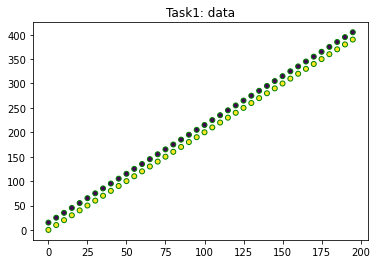

In [5]:
# визуализируем графики
plt.title("Task1: data")

line1 = plots1

line2 = plots2

X = np.array(line1+line2)

class1 = []
for i in range(40):
  class1.append(0)

class2 = []
for i in range(40):
  class2.append(1)

Y = np.array(class1 + class2)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
            s=25, edgecolor='g')

In [0]:
params_logreg = {'dual' : [True, False], 'C': np.arange(.01,1,.01), 'solver' : ['liblinear']}

In [7]:
pipeline(LogisticRegression(), X, Y, params_logreg)

Accuracy на трейне:  1.0


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

Accuracy после регулиризации:  1.0
Лучшие гиперпараметры:  {'C': 0.01, 'dual': False, 'solver': 'liblinear'}
Accuracy на тесте  1.0


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

In [0]:
paramsKNN = {'n_neighbors': range(1, 10), 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

In [10]:
pipeline(KNeighborsClassifier(), X, Y, paramsKNN)

Accuracy на трейне:  0.5833333333333334
Accuracy после регулиризации:  0.4
Лучшие гиперпараметры:  {'algorithm': 'auto', 'n_neighbors': 5}
Accuracy на тесте  0.2


Ура! 
Accuracy на тесте с регрессией = 1, на тесте с k-NN = 0.2

# TASK 2
Create dataset for binary classification task (binary crossentropy), where logistic regression perfoms worse than k-NN

Тут данные, наоборот, должны выглядеть так, чтобы просто по линии разделить было неудобно, но при этом хорошо было бы смотреть на соседей и определять принадлежность к классу. Получается, данные должны быть линейно НЕразделимы, но при этом скучены, то есть выглядеть примерно как две окружности.

 Vamos!

In [0]:
X, Y = make_circles(n_samples = 100, factor = 0.8, random_state = 42, noise = 0.05)

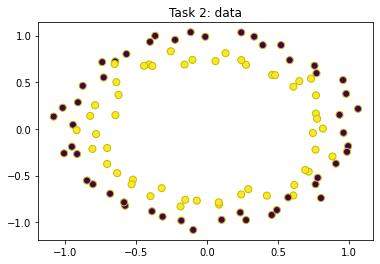

In [13]:
plt.title("Task 2: data")
plt.scatter(X[:, 0], X[:, 1], c = Y, s = 50, edgecolor='y')

In [15]:
pipeline(LogisticRegression(), X, Y, params_logreg)

Accuracy на трейне:  0.56
Accuracy после регулиризации:  0.56
Лучшие гиперпараметры:  {'C': 0.01, 'dual': True, 'solver': 'liblinear'}
Accuracy на тесте  0.32


In [16]:
pipeline(KNeighborsClassifier(), X, Y, paramsKNN)

Accuracy на трейне:  0.88
Accuracy после регулиризации:  0.7866666666666667
Лучшие гиперпараметры:  {'algorithm': 'auto', 'n_neighbors': 1}
Accuracy на тесте  0.76


Отлично-отлично! 

Accuracy на тесте в линейной регресии 0.32, а при k-NN = 0.76. 

И это супер!

# TASK 3
Create dataset for binary classification task (binary crossentropy), where k-NN with cosine distance perfoms better than k-NN with euclidean distance

Заметим, что евклидово расстояние берет во внимание непосредственно значения векторов, в то время как косинусное расстояние – направление вектора.

Получается, чтобы k-NN с косинусным расстоянием справлялся лучше, чем k-NN с евклидовым расстоянием, возьмем близкие друг к другу вектора, но при этом так, чтобы угол между ними был большой. 

Пусть один класс лежит на прямой, а второй распределен по плоскости. 

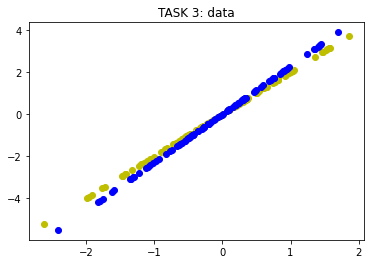

In [17]:
np.random.seed(42)
X1 = [(1*k , 2*k) for k in np.random.normal(0, 1, size=(100, ))]
Y1 = [1 for i in range(100)]
np.random.seed(42)
X2 = [(0.92*k , 2.1*k ) for k in np.random.normal(0, 1, size=(100, ))]
Y2 = [0 for i in range(100)]

plt.title("TASK 3: data")
plt.scatter([i[0] for i in X1],
            [i[1] for i in X1],
            color="y")
plt.scatter([i[0] for i in X2],
            [i[1] for i in X2], color="b")
plt.show()

In [0]:
X = np.array(X1 + X2)
Y = np.array(Y1 + Y2)

In [20]:
pipeline(KNeighborsClassifier(metric="euclidean"), X, Y,
                 {'n_neighbors': range(1, 10)})

Accuracy на трейне:  0.7466666666666667
Accuracy после регулиризации:  0.7066666666666667
Лучшие гиперпараметры:  {'n_neighbors': 1}
Accuracy на тесте  0.74


In [23]:
pipeline(KNeighborsClassifier(metric="cosine"), X, Y,
                 {'n_neighbors': range(1, 10)})

Accuracy на трейне:  1.0
Accuracy после регулиризации:  1.0
Лучшие гиперпараметры:  {'n_neighbors': 1}
Accuracy на тесте  1.0


Ура!  k-NN с косинусным расстоянием работает лучше, чем k-NN с евклидовым расстоянием